# Day 1 : Code used during lecture and lab assignment

### Instructions

- The notebook combines 'code used during lecture' with the 'Day 1 lab' assignment (see further down)
- The lab assignment can be done largely by copying/paste/modification of the code used during the lecture
- Please add answers/discussion/comments to the notebook as comments or text box. Do not create another file in addition.
- When you are done with your assignment, save the notebook in drive and add your last name to the name of the file
- Upload your final notebook to https://uni-bonn.sciebo.de/s/PRBpXWkIandOj0M latest by September 30th. The password for access was sent to you by email

# Code used during lecture



In [1]:
# Import libaries that will be used in the notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
# Download data
!wget -nc https://ilr-ml.s3.eu-central-1.amazonaws.com/brazil_all_data_v2.gz

--2022-09-19 12:40:31--  https://ilr-ml.s3.eu-central-1.amazonaws.com/brazil_all_data_v2.gz
Resolving ilr-ml.s3.eu-central-1.amazonaws.com (ilr-ml.s3.eu-central-1.amazonaws.com)... 52.219.170.86
Connecting to ilr-ml.s3.eu-central-1.amazonaws.com (ilr-ml.s3.eu-central-1.amazonaws.com)|52.219.170.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 283350352 (270M) [application/x-gzip]
Saving to: ‘brazil_all_data_v2.gz’

brazil_all_data_v2. 100%[===================>] 270.22M  28.3MB/s    in 10s     

2022-09-19 12:40:42 (26.0 MB/s) - ‘brazil_all_data_v2.gz’ saved [283350352/283350352]



In [3]:
# Load data with pandas into a dataframe 
df = pd.read_parquet('brazil_all_data_v2.gz')

In [4]:
# Have a look at the data
print('Number of rows:', df.shape[0])
df.head(5)

Number of rows: 249940


id  row  col        lon        lat       bean     carrot  cassava  \
0   0    0    0 -59.989876 -10.010125  200.00000  335.00000    201.0   
1   1    0    1 -59.969875 -10.010125  200.00000  335.00000    201.0   
2   2    0    2 -59.949875 -10.010125  200.00000  335.00000    201.0   
3   3    0    3 -59.929874 -10.010125  200.00000  335.00000    201.0   
4   4    0    4 -59.909874 -10.010125  218.33334  435.83334    216.0   

   chickpea  citrus  ...  tot_defor_2010_lag_3rd_order  \
0       0.0   391.0  ...                      1.800000   
1       0.0   391.0  ...                      1.052631   
2       0.0   391.0  ...                      3.652174   
3       0.0   391.0  ...                      3.814815   
4       0.0   523.5  ...                      8.296296   

   tot_defor_2011_lag_3rd_order  tot_defor_2012_lag_3rd_order  \
0                      1.333333                      6.866667   
1                      2.000000                      5.105263   
2                      1.652174                      5.913043   
3                      2.666667                      5.407407   
4                      2.629630                      5.222222   

   tot_defor_2013_lag_3rd_order  tot_defor_2014_lag_3rd_order  \
0                      0.733333                      2.200000   
1                      0.526316                      0.947368   
2                      4.086957                      4.521739   
3                      4.000000                      3.925926   
4                      7.592592                      5.370370   

   tot_defor_2015_lag_3rd_order  tot_defor_2016_lag_3rd_order  \
0                      4.466667                      9.866667   
1                      1.473684                      9.473684   
2                      4.956522                      8.695652   
3                      3.703704                      5.888889   
4                      4.481482                      8.888889   

   tot_defor_2017_lag_3rd_order  tot_defor_2018_lag_3rd_order  s  
0                      6.600000                      0.800000  1  
1                      6.210527                      2.000000  1  
2                     11.217392                      5.173913  1  
3                     19.629629                      6.518518  1  
4                     18.888889                      5.222222  1  

[5 rows x 426 columns]

In [5]:
# Define target (dependent) variable (% forest cover for 2018)
strY = 'perc_treecover'


# Define a list of features names (explantory variables)
lstX = [
  'wdpa_2017',
  'population_2015',
  'chirps_2017',
  'maize',
  'soy',
  'sugarcane',
  'perm_water',
  'travel_min',
  'cropland',
  'mean_elev',
  'sd_elev',
  'near_road',
 ]



Run OLS on forest cover

In [6]:
# Get target variable and features
Y_all = df[strY]
X_all = df.loc[:,lstX]

In [7]:
# Run OLS using sklearn
# We run an regression using sklearn which is one of the most popular 
# libaries for machine learning 
 
# Define model (automatically add a constant and normalize the data) 
regOls = LinearRegression(fit_intercept=True, normalize=True)
# Fit model
regOls.fit(X_all, Y_all)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [8]:
from scipy.stats import norm
# View regression results
# Note: Sklearn is not econometric package and does not provide our classical 
# regression table output. This is not what the machine learning community
# looks at. However, we can calculate these things manually.

# Get coef
coefs = np.hstack((regOls.intercept_,regOls.coef_))

N = Y_all.shape[0]
K = coefs.shape[0]

# Get predicted values y hat
Y_hat = regOls.predict(X_all)
# Get errors
err = Y_all-Y_hat
# Get standard error of regression
sig2 = (err.transpose() @ err) / (N-K)
sig2

# Add constant to X_all (sklearn did this automatically)
Xc_all = np.insert(np.array(X_all), 0, 1, axis = 1)

# Covariance matrix for coef
VarBeta = sig2 * np.linalg.inv(Xc_all.T @ Xc_all)
# Standard error of coef
se = np.sqrt(np.diag(VarBeta))
# t-values
t =  coefs/se
# p-values  
p = (1 - norm.cdf(abs(t))) * 2
# Prepare df as output
resOls = pd.DataFrame(coefs,index=['const']+lstX,columns=['beta'])
resOls['SE'] = se
resOls['t'] = t
resOls['p-value'] = p
resOls

beta        SE           t   p-value
const            -5.831235  1.324112   -4.403882  0.000011
wdpa_2017        11.427969  0.156940   72.817276  0.000000
population_2015  -0.008522  0.000677  -12.595832  0.000000
chirps_2017       0.036649  0.000314  116.867636  0.000000
maize             0.019095  0.000159  120.445045  0.000000
soy              -0.030865  0.000407  -75.758273  0.000000
sugarcane        -0.003199  0.000141  -22.739455  0.000000
perm_water      -21.908606  1.184469  -18.496556  0.000000
travel_min        0.019945  0.000139  143.456389  0.000000
cropland         -1.174515  0.540421   -2.173335  0.029755
mean_elev        -0.023366  0.000449  -51.999590  0.000000
sd_elev           0.417715  0.004348   96.080777  0.000000
near_road         0.069442  0.001149   60.442058  0.000000

In [9]:
# To confirm the results we can use the OLS function in the statsmodel libary.
# This is more a statistical libary, not typically used for machine learning, 
# but providing our typicall regression output

import statsmodels.api as sm

olsStats = sm.OLS(Y_all, np.insert(np.array(X_all), 0, 1, axis = 1))
# Set the names of the explanatory variables
olsStats.data.xnames = ['const']+lstX
olsStats_result = olsStats.fit()
olsStats_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         perc_treecover   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                 1.688e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:40:52   Log-Likelihood:            -1.1677e+06
No. Observations:              249940   AIC:                         2.335e+06
Df Residuals:                  249927   BIC:                         2.336e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.8312      1.324     -4.404      0.000      -8.426      -3.236
wdpa_2017          11.4280      0.157     72.817      0.000      11.120      11.736
population_2015    -0.0085      0.001    -12.596      0.000      -0.010      -0.007
chirps_2017         0.0366      0.000    116.868      0.000       0.036       0.037
maize               0.0191      0.000    120.445      0.000       0.019       0.019
soy                -0.0309      0.000    -75.758      0.000      -0.032      -0.030
sugarcane          -0.0032      0.000    -22.739      0.000      -0.003      -0.003
perm_water        -21.9086      1.184    -18.497      0.000     -24.230     -19.587
travel_min          0.0199      0.000    143.456      0.000       0.020       0.020
cropland           -1.1745      0.540     -2.173      0.030      -2.234      -0.115
mean_elev          -0.0234      0.000    -52.000      0.000      -0.024      -0.022
sd_elev             0.4177      0.004     96.081      0.000       0.409       0.426
near_road           0.0694      0.001     60.442      0.000       0.067       0.072
==============================================================================
Omnibus:                     2376.776   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1780.521
Skew:                           0.113   Prob(JB):                         0.00
Kurtosis:                       2.654   Cond. No.                     1.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Mean squared error:  669.092064194029
Coefficient of determination:  0.44772019128724716


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


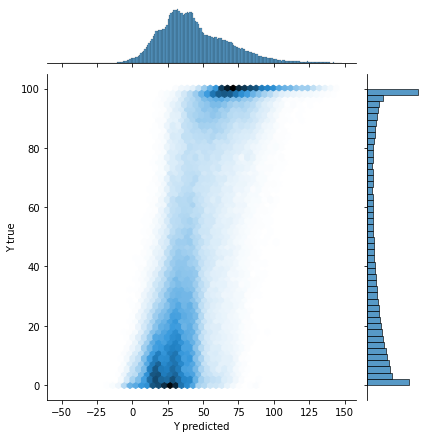

In [10]:
# Now we want to see how good our OLS regression performs in sample
# i.e. on the training data itself

# Make predictions for the same dataset X_all
Y_hat = regOls.predict(X_all)

# The mean squared error
mse_ols_sklearn  = mean_squared_error(Y_all,Y_hat)
print('\nMean squared error: ',mse_ols_sklearn)
# The coefficient of determination: 1 is perfect prediction
R2_ols_sklearn = r2_score(Y_all,Y_hat)
print('Coefficient of determination: ',R2_ols_sklearn)

# plot Y vs Y-hat
h = sns.jointplot(Y_hat, Y_all, kind="hex")
h.set_axis_labels('Y predicted', 'Y true');

Now we explore what consequences it has if a model overfits. For this we generate interaction and squared terms and compare model performance in a training and test set approach.

In [11]:
# Set a random number seed such that everybody has the same "random" split 
# of the data
np.random.seed(111)
# Split the data into train and test data using sklearn train_test_split object
#   (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#   Note: This randomly split the data in 80% train and 20% test data
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2)

In [12]:
# In order to better illustrate the overfitting effects we 
# artificially reduce the training data size.  Why do we do this? In general 
# a larger sample size helps to reduce overfitting problems. With a smaller 
# sample size polynomials of order 2 of our variables are sufficient to show 
# the effects. With the full sample size we would need to consider much higher 
# polynomials to show the same effects. 
N = 2000
X_train = X_train.iloc[:N,:]
Y_train = Y_train.iloc[:N]


In [13]:
# Use an sklearn function to generate polynomials of order 2 
# (square terms and interaction terms)
# (see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.get_feature_names)
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print('Total number of avaliable features',X_train_poly.shape[1])
lstFeatures = poly.get_feature_names()
# Show feature names
# list(lstFeatures)



Total number of avaliable features 91


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
# To explore overfitting we now run an small simulation...
# we squentially increase our model complexity by adding on additional features. 
# In each case we estimate the model and obtain models stats
# for the train and test set.

# Prepare a dataframe to hold the results
res = pd.DataFrame()

# Each iteration add in one  additional variables
for numVar in range(0,X_train_poly.shape[1]):

  # Define the feature set for the iteration 
  X_train_subSet = X_train_poly[:,:numVar+1]
  X_test_subSet = X_test_poly[:,:numVar+1]
  
  # Create linear regression object
  regOls = LinearRegression(normalize=True)

  # Train the model using the training sets
  regOls.fit(X_train_subSet, Y_train)

  # Get predicted values
  Y_hat_train = regOls.predict(X_train_subSet)
  Y_hat_test = regOls.predict(X_test_subSet)

  # Store model stats 
  res.loc[f"numVar_{numVar}",'Number of X Variables'] = X_train_subSet.shape[1]
  res.loc[f"numVar_{numVar}",'New Feature'] = lstFeatures[numVar]

  # The mean squared error
  res.loc[f"numVar_{numVar}",'MSE Train'] = mean_squared_error(Y_train,Y_hat_train)
  res.loc[f"numVar_{numVar}",'MSE Test'] = mean_squared_error(Y_test,Y_hat_test)
  # The coefficient of determination: 1 is perfect prediction
  res.loc[f"numVar_{numVar}",'R2 train'] = r2_score(Y_train,Y_hat_train)
  res.loc[f"numVar_{numVar}",'R2 test'] = r2_score(Y_test,Y_hat_test)


# => The column "New Feature" says which feature was added in this iteration 
#    on top of all the other added before, starting with only a constant
# => Have a look how R2 and MSE develops in the train and test set when 
#    increasing model complexity.
res


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

Number of X Variables New Feature    MSE Train      MSE Test  \
numVar_0                     1.0           1  1216.525636   1213.005815   
numVar_1                     2.0          x0  1092.857849   1102.641178   
numVar_2                     3.0          x1  1091.452623   1101.598429   
numVar_3                     4.0          x2   956.060772    981.976805   
numVar_4                     5.0          x3   913.715950    929.376214   
...                          ...         ...          ...           ...   
numVar_86                   87.0      x9 x10   530.718203  42927.052274   
numVar_87                   88.0      x9 x11   523.025791  43000.110736   
numVar_88                   89.0       x10^2   518.977085  37915.027224   
numVar_89                   90.0     x10 x11   517.769904  37210.556117   
numVar_90                   91.0       x11^2   515.200839  40050.104395   

           R2 train    R2 test  
numVar_0   0.000000  -0.000181  
numVar_1   0.101657   0.090820  
numVar_2   0.102812   0.091680  
numVar_3   0.214106   0.190314  
numVar_4   0.248914   0.233685  
...             ...        ...  
numVar_86  0.563743 -34.395385  
numVar_87  0.570066 -34.455625  
numVar_88  0.573394 -30.262733  
numVar_89  0.574386 -29.681864  
numVar_90  0.576498 -32.023205  

[91 rows x 6 columns]

In [15]:
# Before we continue lets check if our simulation is correct, by comparing
# row "numVar_12" from "res" with our statsmodel and sklearn that we 
# have use above
print('Results from statsmodel:')
print('R2',olsStats_result.rsquared)
print('MSE',olsStats_result.mse_resid)

print('\nResults from sklearn:')
print('Mean squared error: ',mse_ols_sklearn)
print('Coefficient of determination: ',R2_ols_sklearn)

# Check that the results match our "res" data frame in row "numVar_12", which is
# a linear model with all explanatory variables
print('\nResults from row "numVar_12" from the "res" dataframe')
print(res.loc['numVar_12',:])

# => Note that in the simulation our X_train is a much smaller subsample 
#   of the full data set. Hence, we have some small variation but overall 
#   the result is very comparable 

Results from statsmodel:
R2 0.44772019128724727
MSE 669.1268671438283

Results from sklearn:
Mean squared error:  669.092064194029
Coefficient of determination:  0.44772019128724716

Results from row "numVar_12" from the "res" dataframe
Number of X Variables          13.0
New Feature                     x11
MSE Train                655.299137
MSE Test                 672.795379
R2 train                   0.461336
R2 test                    0.445248
Name: numVar_12, dtype: object


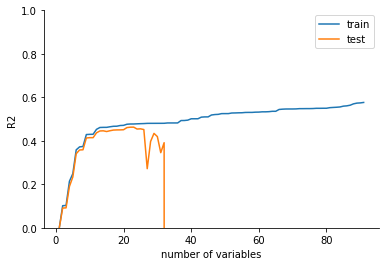

In [16]:
# Now back to our simulation results. To inspect the overfitting of the model
# lets plot R2 and MSE against the number of variables in the model.

# Start with R2
fig, ax = plt.subplots()
ax.plot(res['Number of X Variables'],res['R2 train'],label='train')
ax.plot(res['Number of X Variables'],res['R2 test'],label='test')
ax.set_ylabel('R2')
ax.set_xlabel('number of variables')
ax.set_ylim(0,1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend();

# => Note that in same cases our R2 in the test set is negative, which means
#    that our model is completely off...

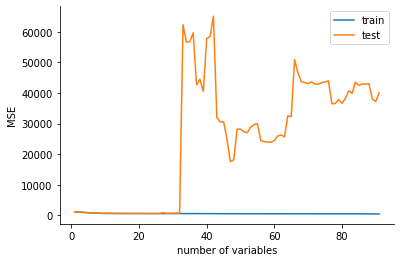

In [17]:
# ... and MSE
fig, ax = plt.subplots()
ax.plot(res['Number of X Variables'],res['MSE Train'],label='train')
ax.plot(res['Number of X Variables'],res['MSE Test'],label='test')
ax.set_ylabel('MSE')
ax.set_xlabel('number of variables')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend();

In [18]:
# =====================================
# Question to discuss in the group:
# =====================================

# What can you conclude from the plots?

In [19]:
# Now, we can find the "best" specification from our simulation 
# by checking where R2 is highest in test set
iRes = res.loc[res['R2 test']==res['R2 test'].max(),:]
lstFeatures[:int(iRes['Number of X Variables'])]


['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9']

In [20]:
# =====================================
# Question to discuss in the group:
# =====================================

# Why might this model specification strategy not be ideal?

### Let's see how Lasso could be used here

In [21]:
# The idea is that instead of adding in one variable at a time, we use all
# and let Lasso decide which ones to use. 

# It turns out that in order to get better results we need to make 
# the problem one step simpler for Lasso. If we use all polynomial terms 
# Lasso has convergence issues, at least with the restricted sample size 
# that we used above. Apparently the problem is that our variables are too 
# correlated. However, we can also illustrate the apporoach by using only linear 
# and square terms (excluding the interaction terms).  

In [22]:
# Get only the linear and square terms from the polynomials
idxSq = list(range(0,13))+[lstFeatures.index(c) for c in lstFeatures if '^2' in c]
lstColNames = [lstFeatures[i] for i in idxSq]
X_trainSq = X_train_poly[:,idxSq]
X_testSq = X_test_poly[:,idxSq]



In [23]:
# Get actual names for features instead of x1,...,x11
# this is required for a plot further down...
sCols = pd.Series(lstColNames)
sCols = sCols.replace({'\^2':'_sq'},regex=True)
sCols = sCols.replace({'1':'const'},regex=False)
dctReplace = {f"x{i}":lstX[i] for i in range(10,len(lstX))}
sCols = sCols.replace(dctReplace,regex=True)
dctReplace = {f"x{i}":lstX[i] for i in range(0,10)}
sCols = sCols.replace(dctReplace,regex=True)
lstColNames = sCols


In [24]:
# Create a list with alpha (= lambda in the lecture) values that we want to test for our Lasso estimation
lstAlpha = np.logspace(-16, -9, num = 10, base = 2)
lstAlpha

array([1.52587891e-05, 2.61610102e-05, 4.48527372e-05, 7.68994781e-05,
       1.31843230e-04, 2.26043631e-04, 3.87549085e-04, 6.64448242e-04,
       1.13918852e-03, 1.95312500e-03])

In [25]:
# Now loop over the alphas, run a Lasso estimation and get the model stats 
# Note the alphas here are just the same as the penalty (lambda)

# Create a dataframe to hold model stats
resLasso = pd.DataFrame()
# Create a dataframe to hold coef
resCoef = pd.DataFrame(columns=lstColNames)

# Loop over a range of alpha value
for alpha in lstAlpha:
  print(alpha)
  # Estimate Lasso
  if alpha >0:
    modLasso = Lasso(normalize=True, fit_intercept=True, alpha=alpha)
  else:  
    # in case of alpha = 0 use LinearRegression as recommended by sklearn
    modLasso = LinearRegression(normalize=True, fit_intercept=True)
  modLasso.fit(X_trainSq, Y_train)

  # Get predicted values
  Y_hat_train = modLasso.predict(X_trainSq)
  Y_hat_test = modLasso.predict(X_testSq)

  # Get model stats
  resLasso.loc[f"lasso_{alpha}",'MSE Train'] = mean_squared_error(Y_train,Y_hat_train)
  resLasso.loc[f"lasso_{alpha}",'MSE Test'] = mean_squared_error(Y_test,Y_hat_test)
  # The coefficient of determination: 1 is perfect prediction
  resLasso.loc[f"lasso_{alpha}",'R2 train'] = r2_score(Y_train,Y_hat_train)
  resLasso.loc[f"lasso_{alpha}",'R2 test'] = r2_score(Y_test,Y_hat_test)
  
  resLasso.loc[f"lasso_{alpha}",'alpha'] = alpha

  resCoef.loc[f'beta_hat_alpha{alpha}','alpha',] = alpha
  resCoef.loc[f'beta_hat_alpha{alpha}',lstColNames] = modLasso.coef_.transpose()


# => As you will see in the output, there are some values of alpha for which 
#   Lasso does not converge. This is not ideal but for our results we can 
#   ignore this for now.
# => Again check how MSE and R2 developed for varying values of alpha

resLasso

1.52587890625e-05
2.6161010218904826e-05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.048e+05, tolerance: 2.

4.485273719102779e-05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.207e+04, tolerance: 2.433e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set

7.689947814299766e-05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.764e+04, tolerance: 2.433e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set

0.00013184322984525218
0.00022604363092951433


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.064e+03, tolerance: 2.433e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set

0.000387549084953174
0.0006644482422726451


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.843e+02, tolerance: 2.433e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set

0.0011391885152110507


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.646e+02, tolerance: 2.433e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set

0.001953125


MSE Train    MSE Test  R2 train   R2 test  \
lasso_1.52587890625e-05       593.657261  627.688094  0.512006  0.482441   
lasso_2.6161010218904826e-05  593.660229  627.619396  0.512004  0.482498   
lasso_4.485273719102779e-05   593.668860  627.505851  0.511996  0.482592   
lasso_7.689947814299766e-05   593.694066  627.323643  0.511976  0.482742   
lasso_0.00013184322984525218  593.767876  627.047868  0.511915  0.482969   
lasso_0.00022604363092951433  593.984358  626.682714  0.511737  0.483270   
lasso_0.000387549084953174    594.619874  626.373121  0.511215  0.483526   
lasso_0.0006644482422726451   595.720439  625.881953  0.510310  0.483931   
lasso_0.0011391885152110507   598.108087  625.772255  0.508347  0.484021   
lasso_0.001953125             604.935875  629.384882  0.502735  0.481042   

                                 alpha  
lasso_1.52587890625e-05       0.000015  
lasso_2.6161010218904826e-05  0.000026  
lasso_4.485273719102779e-05   0.000045  
lasso_7.689947814299766e-05   0.000077  
lasso_0.00013184322984525218  0.000132  
lasso_0.00022604363092951433  0.000226  
lasso_0.000387549084953174    0.000388  
lasso_0.0006644482422726451   0.000664  
lasso_0.0011391885152110507   0.001139  
lasso_0.001953125             0.001953

In [26]:
# Get the "best" alpha by checking where MSE is lowest in test set 
# (or R2 is highest)
iRes = resLasso.loc[resLasso['R2 test']==resLasso['R2 test'].max(),:]
alphaBest = resLasso.loc[resLasso['R2 test']==resLasso['R2 test'].max(),'alpha'][0]
print('The "best" (from those we tried in the simulations) is: ', alphaBest)

The "best" (from those we tried in the simulations) is:  0.0011391885152110507


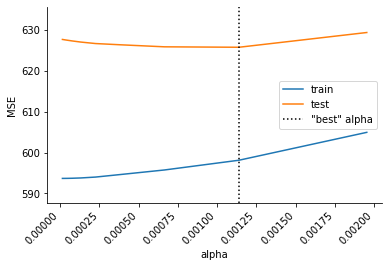

In [27]:
# Plot result

# Define range of Y that should be shown in plot
rangeYLow = resLasso['MSE Train'].min()*0.99
rangeYHigh = resLasso['MSE Test'].max()*1.01

fig, ax = plt.subplots()
ax.plot(resLasso['alpha'],resLasso['MSE Train'],label='train')
ax.plot(resLasso['alpha'],resLasso['MSE Test'],label='test')
ax.plot([alphaBest,alphaBest],[rangeYLow,rangeYHigh],label='"best" alpha',linestyle=':',color='black')
ax.set_ylabel('MSE')
ax.set_xlabel('alpha')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.autofmt_xdate(rotation=45)
ax.set_ylim(rangeYLow,rangeYHigh)
ax.legend();

In [46]:
# Repeat the simulation with a slightly larger alpha range
# in order to prepare a plot with the estimated coefficients against alpha 
# Df to hold coef
resCoef = pd.DataFrame(columns=lstColNames)
lstAlphaNew = np.logspace(-16, 0, num = 10, base = 2)

# Loop over a range of alpha value
for alpha in lstAlphaNew:
  # Estimate Lasso
  if alpha >0:
    modLasso = Lasso(normalize=True, fit_intercept=True, alpha=alpha)
  else:  
    # in case of alpha = 0 use LinearRegression as recommended by sklearn
    modLasso = LinearRegression(normalize=True, fit_intercept=True)
  modLasso.fit(X_trainSq, Y_train)

  # Get predicted values
  Y_hat_train = modLasso.predict(X_trainSq)
  Y_hat_test = modLasso.predict(X_testSq)

  # Get model stats
  resCoef.loc[f'beta_hat_alpha{alpha}','MSE Train'] = mean_squared_error(Y_train,Y_hat_train)
  resCoef.loc[f'beta_hat_alpha{alpha}','MSE Test'] = mean_squared_error(Y_test,Y_hat_test)

  resCoef.loc[f'beta_hat_alpha{alpha}','alpha',] = alpha
  resCoef.loc[f'beta_hat_alpha{alpha}',lstColNames] = modLasso.coef_.transpose()



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.048e+05, tolerance: 2.433e+02

/usr/

In [49]:
resCoef.loc[:,['MSE Train', 'MSE Test', 'alpha']]

MSE Train     MSE Test     alpha
beta_hat_alpha1.52587890625e-05        593.657261   627.688094  0.000015
beta_hat_alpha5.232202043780965e-05    593.673560   627.461976  0.000052
beta_hat_alpha0.00017941094876411116   593.862992   626.846480  0.000179
beta_hat_alpha0.0006151958251439805    595.539251   625.984011  0.000615
beta_hat_alpha0.002109491677524035     606.445968   630.443223  0.002109
beta_hat_alpha0.0072333961897444584    623.368980   642.720501  0.007233
beta_hat_alpha0.024803141437003108     671.346003   687.582713  0.024803
beta_hat_alpha0.08504937501089847      761.687398   777.474703  0.085049
beta_hat_alpha0.29163225989402897     1033.612108  1037.566788  0.291632
beta_hat_alpha1.0                     1216.525636  1213.005815  1.000000

In [50]:

import plotly.graph_objects as go
# Create traces
fig = go.Figure()

for strBeta in resCoef.columns[1:]:
  # ax.plot(resCoef['alpha'],resPlot[strBeta],label=strBeta)
  fig.add_trace(go.Scatter(x=resCoef['alpha'], y=resCoef[strBeta],
                      mode='lines',
                      name=strBeta))

# Find best alpha
alphaBest = resCoef.loc[resCoef['MSE Test']==resCoef['MSE Test'].min(),'alpha'][0]

rangeYLow = resCoef.min().min()*0.99
rangeYHigh = resCoef.max().max()*1.01
fig.add_trace(go.Scatter(x=[alphaBest,alphaBest], y=[rangeYLow,rangeYHigh],
                    mode='lines',
                    name='bestAlpha',line=dict(color='black', dash='dash')))

fig.update_layout(
    width=800,
    height=400,
    xaxis_type="log",
    xaxis = dict(
       autorange='reversed'
    ),
    yaxis = dict(
       range=[rangeYLow,rangeYHigh],
    )
)
fig.show()

# Day 1 Lab

Today's lab will have you run an OLS and LASSO regression using the deforestation data you saw in the introduction slides and in todays lecture (see code above). 

In the above specification we work with a rather restricted, preselected set of explnatory variables. Also we restricted the sample size artifically. Now try to run a model with a larger set of explanatory variables and using the full data set.

In [30]:
# If you haven't already, load the deforestation data following the code above.
# ==============
# Your code here
# ==============


In [31]:
# Define target (dependent) variable (% forest cover for 2018)
strY = 'perc_treecover'

# Define a list of features names (explantory variables)
lstX = [
  'bean',
 'carrot',
 'cassava',
 'chickpea',
 'citrus',
 'coffee',
 'groundnut',
 'maize',
 'soy',
 'sugarcane',
 'tomato',
 'wheat',
 'perm_water',
 'travel_min',
 'defor_2001',
 'defor_2002',
 'defor_2003',
 'defor_2004',
 'defor_2005',
 'defor_2006',
 'defor_2007',
 'defor_2008',
 'defor_2009',
 'defor_2010',
 'defor_2011',
 'defor_2012',
 'defor_2013',
 'defor_2014',
 'defor_2015',
 'defor_2016',
 'defor_2017',
 'defor_2018',
 'wdpa_1990',
 'wdpa_1991',
 'wdpa_1993',
 'wdpa_1994',
 'wdpa_1995',
 'wdpa_1996',
 'wdpa_1997',
 'wdpa_1998',
 'wdpa_1999',
 'wdpa_2000',
 'wdpa_2001',
 'wdpa_2002',
 'wdpa_2003',
 'wdpa_2004',
 'wdpa_2005',
 'wdpa_2006',
 'wdpa_2007',
 'wdpa_2008',
 'wdpa_2009',
 'wdpa_2010',
 'wdpa_2011',
 'wdpa_2012',
 'wdpa_2014',
 'wdpa_2015',
 'wdpa_2017',
 'wdpa_2018',
 'chirps_2001',
 'chirps_2002',
 'chirps_2003',
 'chirps_2004',
 'chirps_2005',
 'chirps_2006',
 'chirps_2007',
 'chirps_2008',
 'chirps_2009',
 'chirps_2010',
 'chirps_2011',
 'chirps_2012',
 'chirps_2013',
 'chirps_2014',
 'chirps_2015',
 'chirps_2016',
 'chirps_2017',
 'chirps_2018',
 'population_2000',
 'population_2005',
 'population_2010',
 'population_2015',
 'cropland',
 'pasture',
 'mean_elev',
 'sd_elev',
 'near_road',
 'bean_lag_1st_order',
 'carrot_lag_1st_order',
 'cassava_lag_1st_order',
 'chickpea_lag_1st_order',
 'citrus_lag_1st_order',
 'coffee_lag_1st_order',
 'groundnut_lag_1st_order',
 'maize_lag_1st_order',
 'soy_lag_1st_order',
 'sugarcane_lag_1st_order',
 'tomato_lag_1st_order',
 'wheat_lag_1st_order',
 'perm_water_lag_1st_order',
 'travel_min_lag_1st_order',
 'defor_2001_lag_1st_order',
 'defor_2002_lag_1st_order',
 'defor_2003_lag_1st_order',
 'defor_2004_lag_1st_order',
 'defor_2005_lag_1st_order',
 'defor_2006_lag_1st_order',
 'defor_2007_lag_1st_order',
 'defor_2008_lag_1st_order',
 'defor_2009_lag_1st_order',
 'defor_2010_lag_1st_order',
 'defor_2011_lag_1st_order',
 'defor_2012_lag_1st_order',
 'defor_2013_lag_1st_order',
 'defor_2014_lag_1st_order',
 'defor_2015_lag_1st_order',
 'defor_2016_lag_1st_order',
 'defor_2017_lag_1st_order',
 'defor_2018_lag_1st_order',
 'wdpa_1990_lag_1st_order',
 'wdpa_1991_lag_1st_order',
 'wdpa_1993_lag_1st_order',
 'wdpa_1994_lag_1st_order',
 'wdpa_1995_lag_1st_order',
 'wdpa_1996_lag_1st_order',
 'wdpa_1997_lag_1st_order',
 'wdpa_1998_lag_1st_order',
 'wdpa_1999_lag_1st_order',
 'wdpa_2000_lag_1st_order',
 'wdpa_2001_lag_1st_order',
 'wdpa_2002_lag_1st_order',
 'wdpa_2003_lag_1st_order',
 'wdpa_2004_lag_1st_order',
 'wdpa_2005_lag_1st_order',
 'wdpa_2006_lag_1st_order',
 'wdpa_2007_lag_1st_order',
 'wdpa_2008_lag_1st_order',
 'wdpa_2009_lag_1st_order',
 'wdpa_2010_lag_1st_order',
 'wdpa_2011_lag_1st_order',
 'wdpa_2012_lag_1st_order',
 'wdpa_2014_lag_1st_order',
 'wdpa_2015_lag_1st_order',
 'wdpa_2017_lag_1st_order',
 'wdpa_2018_lag_1st_order',
 'chirps_2001_lag_1st_order',
 'chirps_2002_lag_1st_order',
 'chirps_2003_lag_1st_order',
 'chirps_2004_lag_1st_order',
 'chirps_2005_lag_1st_order',
 'chirps_2006_lag_1st_order',
 'chirps_2007_lag_1st_order',
 'chirps_2008_lag_1st_order',
 'chirps_2009_lag_1st_order',
 'chirps_2010_lag_1st_order',
 'chirps_2011_lag_1st_order',
 'chirps_2012_lag_1st_order',
 'chirps_2013_lag_1st_order',
 'chirps_2014_lag_1st_order',
 'chirps_2015_lag_1st_order',
 'chirps_2016_lag_1st_order',
 'chirps_2017_lag_1st_order',
 'chirps_2018_lag_1st_order',
 'population_2000_lag_1st_order',
 'population_2005_lag_1st_order',
 'population_2010_lag_1st_order',
 'population_2015_lag_1st_order',
 'cropland_lag_1st_order',
 'pasture_lag_1st_order',
 'mean_elev_lag_1st_order',
 'sd_elev_lag_1st_order',
 'near_road_lag_1st_order',
 ]

# Get target variable and features
Y_all = df[strY]
X_all = df.loc[:,lstX]


In [32]:
# split the data into a train and test set as above
# ==============
# Your code here
# ==============

In [33]:
# Run an OLS model to predict percent forest cover (using the 'train' part of the previous split for the training)
# ==============
# Your code here
# ==============

In [34]:
# Generate the predicted values for forest cover in the train and test set
# ==============
# Your code here
# ==============

In [35]:
# Produce measures of model fit (R2 and MSE) for train and test data
# ==============
# Your code here
# ==============

In [36]:
# plot predicted versus actual forest cover for test set
# ==============
# Your code here
# ==============

Now run the same specification using a LASSO

In [37]:
# generate a LASSO function from sklearn
# ==============
# Your code here
# ==============
modLasso = ...

In [38]:
# Use the same variable specification as for you OLS model and fit it 
# to the training data
# ==============
# Your code here
# ==============


In [39]:
# Create fitted values for train and test set and compare model fit (R2/MSE)
# as you have done it for OLS
# ==============
# Your code here
# ==============

In [40]:
# Check how many coefficients are selected in Lasso (i.e. are greater 0)
print('Number of total coefficients in Lasso: ' , modLasso.coef_.shape[0])
print('Number of selected coefficients in Lasso: ' ,np.sum(modLasso.coef_>0))

print('\nList selected variables:\n')
list(pd.Series(lstX).loc[modLasso.coef_>0])

AttributeError: ignored

Now change your alpha (lambda) and repeat.  

What happens as you increase your alphs? As you decrease your alphs? Are the results more or less similar to your OLS results?

Note: In this specific case it might be quite difficult to beat the simple OLS result in terms of MSE/R2 in the test set, because OLS is not really overfitting in this example.   

(Optional) So far we are just choosing our training and test set randomly.  Is this valid if there is high spatial correlation?  (if you like) try splitting your data based on latitude and re-run the OLS and the LASSO.  Do you expect your results to be better or worse than using the random split?

In [ ]:
# set a cut-point in the latitude variable to split data into a train and test set

In [ ]:
# re-run OLS and LASSO models using this new train and test set
